In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

final2_df = pd.read_csv('DiseaseAndSymptoms.csv')

In [2]:
final2_df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [3]:
null_counts = final2_df.isnull().sum()

print(null_counts)

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64


In [4]:
final2_df.replace('0', pd.NA, inplace=True)

In [5]:
final2_df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [6]:
all_unique_symptoms = set()
for i in range(1, 18):
    column_name = f'Symptom_{i}'
    unique_symptoms = final2_df[column_name].unique()
    all_unique_symptoms.update(unique_symptoms)

print(f"Total number of unique symptoms across all columns: {len(all_unique_symptoms)}")


print("Number of diseases that can be identified ",len(final2_df['Disease'].unique()))
print(all_unique_symptoms)
print(final2_df['Disease'].unique())

Total number of unique symptoms across all columns: 132
Number of diseases that can be identified  41
{nan, ' watering_from_eyes', ' bruising', ' knee_pain', ' muscle_pain', ' extra_marital_contacts', ' dehydration', ' fast_heart_rate', ' abnormal_menstruation', ' runny_nose', ' polyuria', ' weight_loss', ' coma', ' family_history', ' acute_liver_failure', ' mild_fever', ' restlessness', ' painful_walking', ' loss_of_smell', ' pain_during_bowel_movements', ' irregular_sugar_level', ' history_of_alcohol_consumption', ' cold_hands_and_feets', ' stomach_pain', ' mucoid_sputum', ' nodal_skin_eruptions', ' brittle_nails', ' red_spots_over_body', ' dischromic _patches', ' acidity', ' swollen_blood_vessels', ' constipation', ' continuous_feel_of_urine', ' red_sore_around_nose', ' obesity', ' irritability', ' small_dents_in_nails', ' cough', 'itching', ' visual_disturbances', ' toxic_look_(typhos)', ' pus_filled_pimples', ' chest_pain', ' skin_rash', ' redness_of_eyes', ' yellowing_of_eyes', '

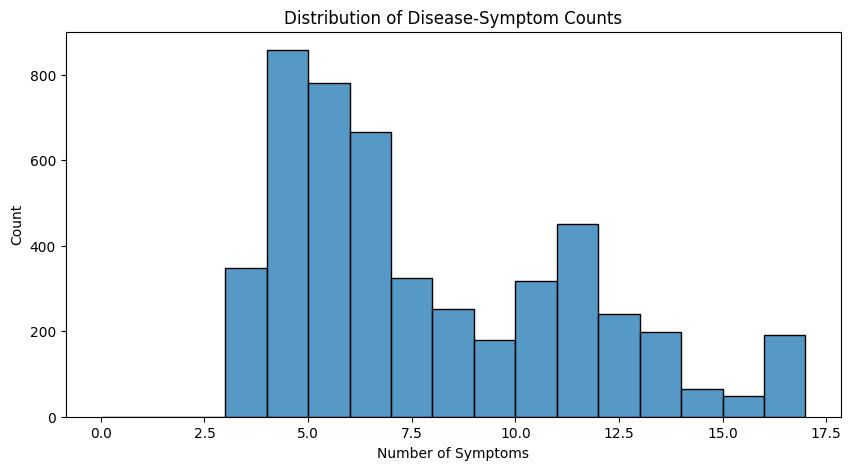

In [7]:
final2_df = final2_df.fillna(0)

final2_df['Symptom_Count'] = final2_df[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 
                                        'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 
                                        'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']].apply(lambda row: row.astype(bool).sum(), axis=1)

plt.figure(figsize=(10, 5))
sns.histplot(final2_df['Symptom_Count'], bins=range(0, 18), kde=False)
plt.xlabel('Number of Symptoms')
plt.ylabel('Count')
plt.title('Distribution of Disease-Symptom Counts')
plt.show()


In [8]:
print(final2_df.columns)

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17', 'Symptom_Count'],
      dtype='object')


In [9]:
column_to_delete = 'Symptom_Count'
final2_df = final2_df.drop(columns=[column_to_delete])
print(final2_df.columns)

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

label_encoder = LabelEncoder()
final2_df['Disease_Label'] = label_encoder.fit_transform(final2_df['Disease'])

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
    
symptoms_columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 
                    'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 
                    'Symptom_16', 'Symptom_17']

final2_df = pd.get_dummies(final2_df, columns=symptoms_columns, drop_first=True)

X = final2_df.drop(['Disease', 'Disease_Label'], axis=1)
y = final2_df['Disease_Label']

with open('columns.pkl', 'wb') as f:
    pickle.dump(X.columns, f)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [11]:
print(final2_df.columns)

Index(['Disease', 'Disease_Label', 'Symptom_1_ back_pain',
       'Symptom_1_ bladder_discomfort', 'Symptom_1_ breathlessness',
       'Symptom_1_ burning_micturition', 'Symptom_1_ chest_pain',
       'Symptom_1_ chills', 'Symptom_1_ constipation',
       'Symptom_1_ continuous_sneezing',
       ...
       'Symptom_14_ congestion', 'Symptom_14_ phlegm',
       'Symptom_14_ red_spots_over_body', 'Symptom_15_ blood_in_sputum',
       'Symptom_15_ chest_pain', 'Symptom_15_ loss_of_smell',
       'Symptom_16_ blood_in_sputum', 'Symptom_16_ loss_of_smell',
       'Symptom_16_ muscle_pain', 'Symptom_17_ muscle_pain'],
      dtype='object', length=393)


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [15]:

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(final2_df['Disease_Label'].unique()), activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test set accuracy: {test_accuracy:.2f}")

# Save the entire model to a HDF5 file
model.save('decease_prediction_model.h5')


Epoch 1/100
108/108 [==============================] - 1s 5ms/step - loss: 1.9413 - accuracy: 0.6051 - val_loss: 0.1406 - val_accuracy: 1.0000
Epoch 2/100
108/108 [==============================] - 0s 3ms/step - loss: 0.1908 - accuracy: 0.9808 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 3/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0611 - accuracy: 0.9930 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 4/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9980 - val_loss: 3.2303e-04 - val_accuracy: 1.0000
Epoch 5/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9968 - val_loss: 1.4669e-04 - val_accuracy: 1.0000
Epoch 6/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9980 - val_loss: 7.8740e-05 - val_accuracy: 1.0000
Epoch 7/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9983 - val_loss: 4.8340e-05 - val_

d:\violence_detection_NN\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


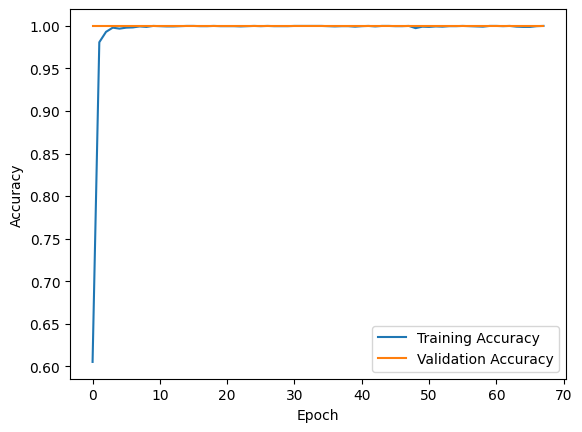

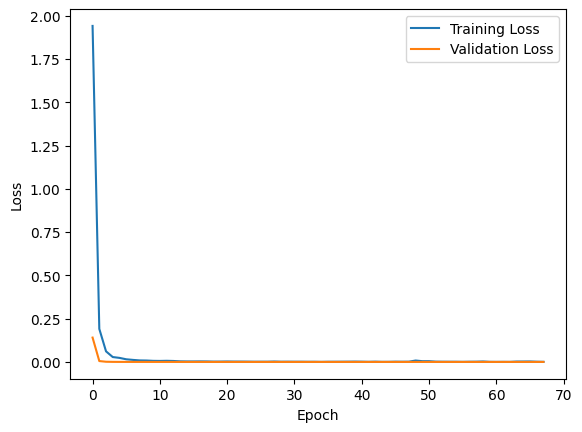

In [16]:
import matplotlib.pyplot as plt

# Train vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Train vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test_original, y_pred_original)
precision = precision_score(y_test_original, y_pred_original, average='weighted')
recall = recall_score(y_test_original, y_pred_original, average='weighted')
f1 = f1_score(y_test_original, y_pred_original, average='weighted')


24/24 [==============================] - 0s 2ms/step
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        14
                                   AIDS       1.00      1.00      1.00        19
                                   Acne       1.00      1.00      1.00        19
                    Alcoholic hepatitis       1.00      1.00      1.00        14
                                Allergy       1.00      1.00      1.00        18
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        11
                            Chicken pox       1.00      1.00      1.00        23
                    Chronic cholestasis       1.00      1.00      1.00       

In [19]:
from keras.models import load_model

# Load the saved model
model = load_model('decease_prediction_model.h5')

# Display the model architecture and parameters
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               50176     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 41)                2665      
                                                                 
Total params: 61097 (238.66 KB)
Trainable params: 61097 (238.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
import pandas as pd
import numpy as np
import pickle
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the LabelEncoder object
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Load the StandardScaler object
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
# Load the column names
with open('columns.pkl', 'rb') as f:
    column_names = pickle.load(f)


# Load the model
model = load_model('decease_prediction_model.h5')

def predict_disease():
    # Prompt the user to enter symptoms
    symptoms_input = input("Enter symptoms separated by commas: ")

    # Preprocess the input
    symptoms = symptoms_input.split(',')
    symptoms = [symptom.strip().lower() for symptom in symptoms]

    
    # Create a new dataframe for the input
    input_df = pd.DataFrame(columns=column_names)
    input_df.loc[0] = 0

    # Set the appropriate columns to 1 based on the input symptoms
    for symptom in symptoms:
        for col in input_df.columns:
            if symptom in col:
                input_df.loc[0, col] = 1

    # Standardize the input
    input_data = scaler.transform(input_df)

    # Make a prediction
    prediction = model.predict(input_data)

    # Decode the prediction
    disease = label_encoder.inverse_transform([np.argmax(prediction)])

    print(f"The predicted disease is: {disease[0]}")

    # Load the treatment data
    treatment_df = pd.read_csv('Disease precaution.csv')

    # Locate the disease in the treatment data
    treatment = treatment_df.loc[treatment_df['Disease'] == disease[0]]

    # Print the treatment plan
    print("The suggested treatment plan is:")
    for i in range(1, 5):
        print(f"Precaution_{i}: {treatment[f'Precaution_{i}'].values[0]}")

# Call the function
predict_disease()


1/1 [==============================] - 0s 65ms/step
The predicted disease is: Psoriasis
The suggested treatment plan is:
Precaution_1: wash hands with warm soapy water
Precaution_2: stop bleeding using pressure
Precaution_3: consult doctor
Precaution_4: salt baths
